# Machine Learning Model to predict the date of payment of an invoice


In [3503]:
#Importing to remove warnings

import warnings
warnings.filterwarnings('ignore')

In [3504]:
#Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
from matplotlib import dates
import matplotlib

In [3505]:
#Reading our data

df = pd.read_csv(r"C:\Users\KIIT\Desktop\1806338.csv")

In [3506]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corporation,2019-10-15 00:00:00,2019.0,1.929946e+09,2019-09-30,20191001,20190930,20191015.0,USD,RV,1.0,NaN,12155.61,20190930.0,NAH4,1.929946e+09,0
1,U001,0200794332,COST foundation,2020-01-29 00:00:00,2020.0,1.930401e+09,2020-01-15,20200115,20200115,20200130.0,USD,RV,1.0,NaN,20557.14,20200115.0,NAAX,1.930401e+09,0
2,U001,0200704045,RA,2019-12-11 00:00:00,2019.0,1.930195e+09,2019-11-26,20191126,20191126,20191211.0,USD,RV,1.0,NaN,122051.38,20191126.0,NAA8,1.930195e+09,0
3,U001,0200769623,WAL-MAR,2019-02-12 00:00:00,2019.0,1.928724e+09,2019-02-02,20190201,20190202,20190217.0,USD,RV,1.0,NaN,12024.59,20190202.0,NAH4,1.928724e+09,0
4,U001,0200759878,SA co,2019-11-19 00:00:00,2019.0,1.930090e+09,2019-11-03,20191102,20191103,20191118.0,USD,RV,1.0,NaN,13174.89,20191103.0,NAH4,1.930090e+09,0
5,U001,200786288,FAMILY us,2019-08-01 00:00:00,2019.0,1.929635e+09,2019-07-19,20190718,20190719,20190803.0,USD,RV,1.0,NaN,13676.49,20190719.0,NAC6,1.929635e+09,0
6,U001,0200290370,BARGAIN foundation,2019-04-29 00:00:00,2019.0,1.929113e+09,2019-04-13,20190409,20190413,20190428.0,USD,RV,1.0,NaN,10617.97,20190413.0,NAA8,1.929113e+09,0
7,U001,0200041573,TAMA associates,2019-04-09 00:00:00,2019.0,1.929035e+09,2019-03-26,20190326,20190326,20190410.0,USD,RV,1.0,NaN,23644.26,20190326.0,NAA8,1.929035e+09,0
8,U001,0200700919,US foundation,2019-11-15 00:00:00,2019.0,1.930061e+09,2019-10-30,20191028,20191030,20191114.0,USD,RV,1.0,NaN,31044.92,20191030.0,NAA8,1.930061e+09,0
9,U001,0200769623,WAL-MAR in,2019-09-05 00:00:00,2019.0,1.929790e+09,2019-08-26,20190824,20190826,20190910.0,USD,RV,1.0,NaN,23274.16,20190826.0,NAH4,1.929790e+09,0


# Conversion of Dates to DateTime Format

#### This conversion is done here instead of in preprocessing as we have sorted the data according to document_create_date.1 before preprocessing

In [3507]:
df.info()
df.info()
df.loc[:,'clear_date']= pd.to_datetime(df.loc[:,'clear_date'])
df['posting_date']=pd.to_datetime(df['posting_date'])
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['document_create_date'] = pd.to_datetime(df['document_create_date'], format='%Y%m%d')
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y%m%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
business_code             50000 non-null object
cust_number               50000 non-null object
name_customer             50000 non-null object
clear_date                45038 non-null object
buisness_year             50000 non-null float64
doc_id                    50000 non-null float64
posting_date              50000 non-null object
document_create_date      50000 non-null int64
document_create_date.1    50000 non-null int64
due_in_date               50000 non-null float64
invoice_currency          50000 non-null object
document type             50000 non-null object
posting_id                50000 non-null float64
area_business             0 non-null float64
total_open_amount         50000 non-null float64
baseline_create_date      50000 non-null float64
cust_payment_terms        50000 non-null object
invoice_id                49994 non-null float64
isOpen                   

#### Here we are checking if clear_date and due_in_date have been converted to datetime format as these dates will be used for finding the delay

In [3508]:
type(df['due_in_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [3509]:
type(df['clear_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

###  Sorting the data according to document_create_date.1

In [3676]:
df = df.sort_values(by="document_create_date.1")
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
29487,U001,0200793513,KROGER in,2019-01-14,2019.0,1.928534e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,16375.19,2018-12-30,NAA8,1.928534e+09,0
6974,CA02,0140105847,GORDON F in,2019-01-17,2019.0,2.960520e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-10,CAD,RV,1.0,NaN,2837.22,2018-12-31,CA10,2.960520e+09,0
10934,U001,0200759878,SA co,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,14897.98,2018-12-30,NAH4,1.928538e+09,0
23960,U001,0200726979,BJ'S associates,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,126.92,2018-12-30,NAA8,1.928541e+09,0
36541,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,NaN,2987.37,2018-12-30,NAH4,1.928543e+09,0


# Splitting of Data

#### We split the data into two parts first :- Test(contains null values from   clear_date) and Rest(contains all values which arent null in clear_date)  

In [3510]:
Test = df[df['clear_date'].isnull()]
Test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
45038,U001,0200769623,WAL-MAR us,NaT,2020.0,1.930798e+09,2020-04-17,2020-04-17,2020-04-17,2020-05-02,USD,RV,1.0,NaN,27374.14,2020-04-17,NAH4,1.930798e+09,1
45039,U001,0200762301,C&S WH corporation,NaT,2020.0,1.930783e+09,2020-04-14,2020-04-14,2020-04-14,2020-04-29,USD,RV,1.0,NaN,32011.41,2020-04-14,NAC6,1.930783e+09,1
45040,U002,0200816950,COLOM trust,NaT,2020.0,1.990573e+09,2020-03-27,2020-03-24,2020-03-27,2020-04-26,USD,RV,1.0,NaN,77241.34,2020-03-27,NA38,1.990573e+09,1
45041,U001,0200769623,WAL-MAR corp,NaT,2020.0,1.930637e+09,2020-03-12,2020-03-10,2020-03-12,2020-03-27,USD,RV,1.0,NaN,12901.99,2020-03-12,NAH4,1.930637e+09,1
45042,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930652e+09,2020-03-14,2020-03-14,2020-03-14,2020-03-29,USD,RV,1.0,NaN,55217.31,2020-03-14,NAH4,1.930652e+09,1


In [3511]:
Test1 = df[df['clear_date'].isnull()]

In [3512]:
Test1.isnull().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                4962
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
document type                0
posting_id                   0
area_business             4962
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
invoice_id                   0
isOpen                       0
dtype: int64

In [3513]:
Rest = df[df['clear_date'].notnull()]
Rest.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corporation,2019-10-15,2019.0,1.929946e+09,2019-09-30,2019-10-01,2019-09-30,2019-10-15,USD,RV,1.0,NaN,12155.61,2019-09-30,NAH4,1.929946e+09,0
1,U001,0200794332,COST foundation,2020-01-29,2020.0,1.930401e+09,2020-01-15,2020-01-15,2020-01-15,2020-01-30,USD,RV,1.0,NaN,20557.14,2020-01-15,NAAX,1.930401e+09,0
2,U001,0200704045,RA,2019-12-11,2019.0,1.930195e+09,2019-11-26,2019-11-26,2019-11-26,2019-12-11,USD,RV,1.0,NaN,122051.38,2019-11-26,NAA8,1.930195e+09,0
3,U001,0200769623,WAL-MAR,2019-02-12,2019.0,1.928724e+09,2019-02-02,2019-02-01,2019-02-02,2019-02-17,USD,RV,1.0,NaN,12024.59,2019-02-02,NAH4,1.928724e+09,0
4,U001,0200759878,SA co,2019-11-19,2019.0,1.930090e+09,2019-11-03,2019-11-02,2019-11-03,2019-11-18,USD,RV,1.0,NaN,13174.89,2019-11-03,NAH4,1.930090e+09,0


# PREPROCESSING


### Preprocessing is the process of cleaning the data

#### Checking for any missing values

In [3516]:
Rest.isna().sum()

index                         0
business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             45038
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

#### Here we see that all columns have non null values whereas the column area_business has 45038 null values out of 50000 data. So all in all this column isnt any use to us so we can drop it.

#### Checking for constant values

In [3517]:
Rest.nunique()

index                     45038
business_code                 6
cust_number                1411
name_customer              4145
clear_date                  406
buisness_year                 2
doc_id                    45038
posting_date                424
document_create_date        429
document_create_date.1      424
due_in_date                 493
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         40789
baseline_create_date        431
cust_payment_terms           72
invoice_id                45032
isOpen                        1
dtype: int64

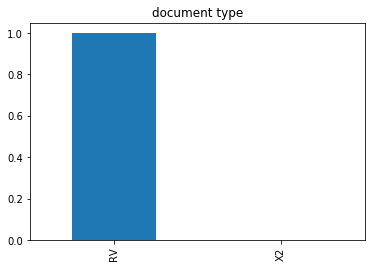

In [3518]:
Rest['document type'].value_counts(normalize=True).plot(kind = 'bar', title = "document type")

#### Here we see majority of the data is RV which means its constant

#### Now we see that doc_id and invoice_id have almost same values so we will delete the one which has more null value and will keep the other one till the time we dont require it


In [3519]:
Rest['invoice_id'].isnull().sum()

6

In [3520]:
Rest['doc_id'].isnull().sum()

0

###  So the columns we drop from our dataset are :

##### 1).posting id (all constant values)
##### 2).area_business (all null values)
##### 3).document_create_date (as we are getting 2 columns of document_create_date so its better to take document_create_date.1)
##### 4).invoice_id (since it has same values as that of doc_id , dropping this column won't make much changes instead of doing null imputation)
##### 5).document type (99 % of the data is constant)

In [3521]:
Rest.drop(['posting_id','invoice_id', 'document_create_date', 'area_business','document type'],axis=1,inplace=True)

In [3522]:
#this data wont have the above mentioned columns
Rest.head()

,index,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,36541,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,2987.37,2018-12-30,NAH4,0
1,25979,U001,0200762301,C&S WH corp,2019-01-15,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,121095.61,2018-12-30,NAC6,0
2,35967,U001,0200769623,WAL-MAR,2019-01-10,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,62632.49,2018-12-30,NAH4,0
3,37253,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,USD,27644.43,2018-12-30,NAH4,0
4,42511,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,51495.26,2018-12-30,NAH4,0


##  Target Column Creation

In [3523]:
Rest['delay'] = Rest['clear_date']-Rest['due_in_date']
Rest['delay'] = Rest['delay'].apply(lambda x: x.days)
Test['delay'] = Test['clear_date']-Test['due_in_date']
Test['delay'] = Test['delay'].apply(lambda x: x.days)


In [3524]:
Test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
45038,U001,0200769623,WAL-MAR us,NaT,2020.0,1.930798e+09,2020-04-17,2020-04-17,2020-04-17,2020-05-02,USD,RV,1.0,NaN,27374.14,2020-04-17,NAH4,1.930798e+09,1,NaN
45039,U001,0200762301,C&S WH corporation,NaT,2020.0,1.930783e+09,2020-04-14,2020-04-14,2020-04-14,2020-04-29,USD,RV,1.0,NaN,32011.41,2020-04-14,NAC6,1.930783e+09,1,NaN
45040,U002,0200816950,COLOM trust,NaT,2020.0,1.990573e+09,2020-03-27,2020-03-24,2020-03-27,2020-04-26,USD,RV,1.0,NaN,77241.34,2020-03-27,NA38,1.990573e+09,1,NaN
45041,U001,0200769623,WAL-MAR corp,NaT,2020.0,1.930637e+09,2020-03-12,2020-03-10,2020-03-12,2020-03-27,USD,RV,1.0,NaN,12901.99,2020-03-12,NAH4,1.930637e+09,1,NaN
45042,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930652e+09,2020-03-14,2020-03-14,2020-03-14,2020-03-29,USD,RV,1.0,NaN,55217.31,2020-03-14,NAH4,1.930652e+09,1,NaN


In [3525]:
# Rest now has the column target_delay
Rest.head(20)

,index,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,36541,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,2987.37,2018-12-30,NAH4,0,-5
1,25979,U001,0200762301,C&S WH corp,2019-01-15,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,121095.61,2018-12-30,NAC6,0,1
2,35967,U001,0200769623,WAL-MAR,2019-01-10,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,62632.49,2018-12-30,NAH4,0,-4
3,37253,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,USD,27644.43,2018-12-30,NAH4,0,-5
4,42511,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,51495.26,2018-12-30,NAH4,0,-4
5,9862,U001,0200769623,WAL-MAR us,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,USD,505.85,2018-12-30,NAH4,0,-5
6,19690,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,USD,13956.77,2018-12-30,NAH4,0,-5
7,16833,U001,0200769623,WAL-MAR co,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,73343.88,2018-12-30,NAH4,0,-5
8,18654,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,1.928536e+09,2018-12-30,2018-12-30,2019-01-14,USD,25749.68,2018-12-30,NAH4,0,-5
9,20696,U001,0200769623,WAL-MAR foundation,2019-01-14,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,267.30,2018-12-30,NAH4,0,0


In [3526]:
Rest.shape

(45038, 16)

#  FURTHER SPLITTING

In [3527]:
train,val1= train_test_split(Rest,shuffle=False,test_size=0.3)

In [3528]:
val2,local_test = train_test_split(val1,shuffle=False,test_size=0.5)

In [3529]:
train.shape

(31526, 16)

# Representation of the 4 DataSets

In [3530]:
train.head()

,index,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,36541,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,2987.37,2018-12-30,NAH4,0,-5
1,25979,U001,0200762301,C&S WH corp,2019-01-15,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,121095.61,2018-12-30,NAC6,0,1
2,35967,U001,0200769623,WAL-MAR,2019-01-10,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,62632.49,2018-12-30,NAH4,0,-4
3,37253,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,USD,27644.43,2018-12-30,NAH4,0,-5
4,42511,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,51495.26,2018-12-30,NAH4,0,-4


In [3531]:
val2.head()

,index,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
31526,24568,U001,0200769623,WAL-MAR us,2019-10-18,2019.0,1.929981e+09,2019-10-07,2019-10-07,2019-10-22,USD,42159.94,2019-10-07,NAH4,0,-4
31527,29308,U001,0200769623,WAL-MAR corp,2019-10-18,2019.0,1.929983e+09,2019-10-07,2019-10-07,2019-10-22,USD,47068.24,2019-10-07,NAH4,0,-4
31528,28985,U001,0200793568,SUPE trust,2019-10-22,2019.0,1.929976e+09,2019-10-07,2019-10-07,2019-10-22,USD,1033.80,2019-10-07,NAA8,0,0
31529,42154,U001,0200803720,DEC us,2019-10-10,2019.0,1.929977e+09,2019-10-07,2019-10-07,2019-10-11,USD,2375.32,2019-10-01,NAM2,0,-1
31530,18871,U001,0200790107,ROU llc,2019-10-23,2019.0,1.929989e+09,2019-10-07,2019-10-07,2019-10-22,USD,52992.03,2019-10-07,NAC6,0,1


In [3532]:
local_test.head()

,index,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
38282,44234,U001,0200761734,H E BUT in,2019-12-24,2019.0,1.930256e+09,2019-12-10,2019-12-10,2019-12-25,USD,26354.13,2019-12-10,NAA8,0,-1
38283,39903,U001,0200705089,JETR,2019-12-26,2019.0,1.930251e+09,2019-12-10,2019-12-10,2019-12-25,USD,17111.84,2019-12-10,NAA8,0,1
38284,984,U001,0200769623,WAL-MAR co,2019-12-23,2019.0,1.930252e+09,2019-12-10,2019-12-10,2019-12-25,USD,12968.80,2019-12-10,NAH4,0,-2
38285,10004,U001,0200769623,WAL-MAR corp,2019-12-27,2019.0,1.930254e+09,2019-12-10,2019-12-10,2019-12-25,USD,5086.01,2019-12-10,NAH4,0,2
38286,24218,U001,0200592182,DECA corporation,2019-12-11,2019.0,1.930257e+09,2019-12-10,2019-12-10,2019-12-08,USD,6665.45,2019-12-01,NAM1,0,3


In [3533]:
Test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
45038,U001,0200769623,WAL-MAR us,NaT,2020.0,1.930798e+09,2020-04-17,2020-04-17,2020-04-17,2020-05-02,USD,RV,1.0,NaN,27374.14,2020-04-17,NAH4,1.930798e+09,1,NaN
45039,U001,0200762301,C&S WH corporation,NaT,2020.0,1.930783e+09,2020-04-14,2020-04-14,2020-04-14,2020-04-29,USD,RV,1.0,NaN,32011.41,2020-04-14,NAC6,1.930783e+09,1,NaN
45040,U002,0200816950,COLOM trust,NaT,2020.0,1.990573e+09,2020-03-27,2020-03-24,2020-03-27,2020-04-26,USD,RV,1.0,NaN,77241.34,2020-03-27,NA38,1.990573e+09,1,NaN
45041,U001,0200769623,WAL-MAR corp,NaT,2020.0,1.930637e+09,2020-03-12,2020-03-10,2020-03-12,2020-03-27,USD,RV,1.0,NaN,12901.99,2020-03-12,NAH4,1.930637e+09,1,NaN
45042,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930652e+09,2020-03-14,2020-03-14,2020-03-14,2020-03-29,USD,RV,1.0,NaN,55217.31,2020-03-14,NAH4,1.930652e+09,1,NaN


# EXPLORATORY DATA ANALYSIS

#### In eda we will first see all the columns we have so that we can do analysis accordingly

In [3534]:
train.columns

Index(['index', 'business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date.1',
       'due_in_date', 'invoice_currency', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'isOpen', 'delay'],
      dtype='object')

In [3535]:
train.describe()

,index,buisness_year,doc_id,total_open_amount,isOpen,delay
count,31526.000000,31526.0,3.152600e+04,31526.000000,31526.0,31526.000000
mean,22509.211222,2019.0,2.013211e+09,31856.276550,0.0,1.150796
std,13018.706066,0.0,2.963687e+08,39704.978323,0.0,11.857969
min,0.000000,2019.0,1.928482e+09,1.030000,0.0,-80.000000
25%,11289.500000,2019.0,1.928998e+09,4413.895000,0.0,-3.000000
50%,22482.500000,2019.0,1.929422e+09,16776.435000,0.0,0.000000
75%,33764.750000,2019.0,1.929766e+09,45952.765000,0.0,2.000000
max,45037.000000,2019.0,9.500000e+09,614809.860000,0.0,268.000000


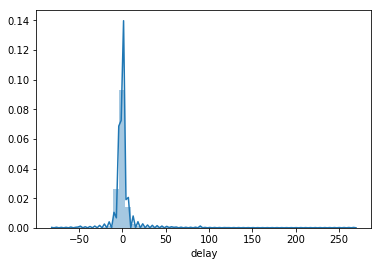

In [3536]:
# We can visually see the distplot of our target column delay
sns.distplot(train["delay"])


In [3537]:
train.head(10)

,index,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,36541,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,2987.37,2018-12-30,NAH4,0,-5
1,25979,U001,0200762301,C&S WH corp,2019-01-15,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,121095.61,2018-12-30,NAC6,0,1
2,35967,U001,0200769623,WAL-MAR,2019-01-10,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,62632.49,2018-12-30,NAH4,0,-4
3,37253,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,USD,27644.43,2018-12-30,NAH4,0,-5
4,42511,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,51495.26,2018-12-30,NAH4,0,-4
5,9862,U001,0200769623,WAL-MAR us,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,USD,505.85,2018-12-30,NAH4,0,-5
6,19690,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,USD,13956.77,2018-12-30,NAH4,0,-5
7,16833,U001,0200769623,WAL-MAR co,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,73343.88,2018-12-30,NAH4,0,-5
8,18654,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,1.928536e+09,2018-12-30,2018-12-30,2019-01-14,USD,25749.68,2018-12-30,NAH4,0,-5
9,20696,U001,0200769623,WAL-MAR foundation,2019-01-14,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,267.30,2018-12-30,NAH4,0,0


# ANALYSIS OF CATEGORICAL FEATURES

In [3538]:
# seeing all categorical variables that are present
categorical_columns = list(train.columns[train.dtypes=='object'])

Text(0,0.5,'number of unique values')

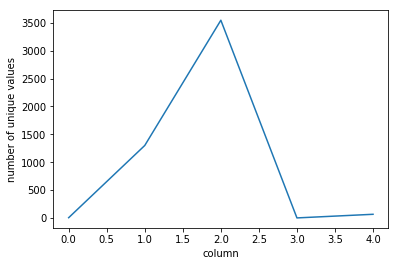

In [3539]:
# plotting total unique values in the categorical columns
plt.plot(list(train[categorical_columns].nunique()))
plt.xlabel("column")
plt.ylabel("number of unique values")

In [3540]:
x=train.describe(include="O")
x

,business_code,cust_number,name_customer,invoice_currency,cust_payment_terms
count,31526,31526,31526,31526,31526
unique,6,1300,3544,2,67
top,U001,0200769623,WAL-MAR associates,USD,NAA8
freq,28466,6755,723,29033,12531


In [3541]:
x.columns

Index(['business_code', 'cust_number', 'name_customer', 'invoice_currency',
       'cust_payment_terms'],
      dtype='object')

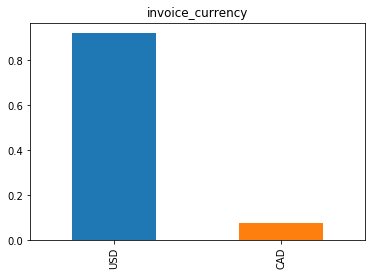

In [3542]:
train.invoice_currency.value_counts(normalize=True).plot(kind = 'bar', title = "invoice_currency")

#### Here we see we have 2 currencies in invoice_currency where USD has the maximum value so we will convert all CAD into USD

### CAD TO USD Conversion in Invoice_Currency

In [3543]:
train["invoice_currency"].unique()

array(['USD', 'CAD'], dtype=object)

In [3544]:
train.loc[train.invoice_currency == "CAD", "total_open_amount"] = (train["total_open_amount"]*.78)
train.loc[train.invoice_currency == "CAD", "invoice_currency"] = "USD"

In [3545]:
train.loc[train.invoice_currency == "CAD", "invoice_currency"] = "USD"

In [3546]:
train["invoice_currency"].unique()

array(['USD'], dtype=object)

In [3547]:
train.head(20)

,index,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,36541,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,2987.37,2018-12-30,NAH4,0,-5
1,25979,U001,0200762301,C&S WH corp,2019-01-15,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,121095.61,2018-12-30,NAC6,0,1
2,35967,U001,0200769623,WAL-MAR,2019-01-10,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,62632.49,2018-12-30,NAH4,0,-4
3,37253,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,USD,27644.43,2018-12-30,NAH4,0,-5
4,42511,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,51495.26,2018-12-30,NAH4,0,-4
5,9862,U001,0200769623,WAL-MAR us,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,USD,505.85,2018-12-30,NAH4,0,-5
6,19690,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,USD,13956.77,2018-12-30,NAH4,0,-5
7,16833,U001,0200769623,WAL-MAR co,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,73343.88,2018-12-30,NAH4,0,-5
8,18654,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,1.928536e+09,2018-12-30,2018-12-30,2019-01-14,USD,25749.68,2018-12-30,NAH4,0,-5
9,20696,U001,0200769623,WAL-MAR foundation,2019-01-14,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,267.30,2018-12-30,NAH4,0,0


In [3548]:
train.head(5)

,index,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,36541,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,2987.37,2018-12-30,NAH4,0,-5
1,25979,U001,0200762301,C&S WH corp,2019-01-15,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,121095.61,2018-12-30,NAC6,0,1
2,35967,U001,0200769623,WAL-MAR,2019-01-10,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,62632.49,2018-12-30,NAH4,0,-4
3,37253,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,USD,27644.43,2018-12-30,NAH4,0,-5
4,42511,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,51495.26,2018-12-30,NAH4,0,-4


In [3549]:
# we can drop the isOpen column as its not of use
train.drop(columns=['isOpen'], inplace=True)

In [3550]:
train.head()

,index,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay
0,36541,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,2987.37,2018-12-30,NAH4,-5
1,25979,U001,0200762301,C&S WH corp,2019-01-15,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,121095.61,2018-12-30,NAC6,1
2,35967,U001,0200769623,WAL-MAR,2019-01-10,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,62632.49,2018-12-30,NAH4,-4
3,37253,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,USD,27644.43,2018-12-30,NAH4,-5
4,42511,U001,0200769623,WAL-MAR corp,2019-01-10,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,51495.26,2018-12-30,NAH4,-4


# Handling Numerical Variables

In [3551]:
num_cols = train._get_numeric_data().columns
num_cols

Index(['index', 'buisness_year', 'doc_id', 'total_open_amount', 'delay'], dtype='object')

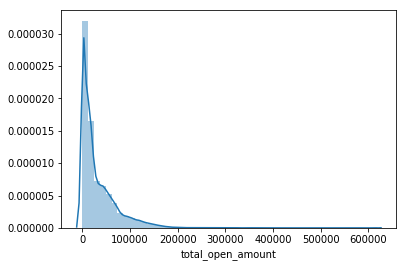

In [3552]:
sns.distplot(Rest["total_open_amount"])

##  OUTLIERS ANALYSIS

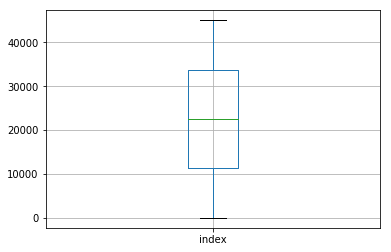

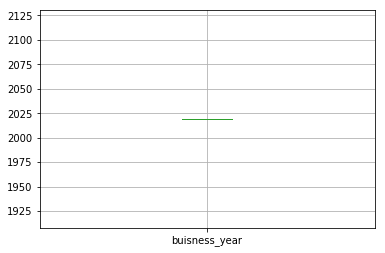

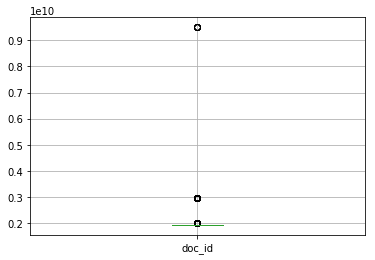

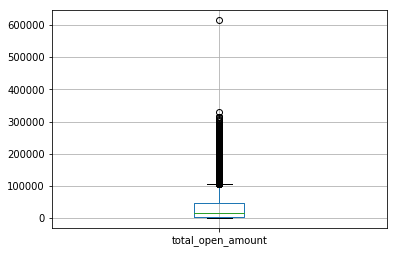

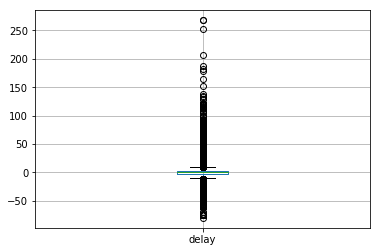

In [3553]:
#to check presence of outliers
train_copy = train.copy()
for feature in num_cols:
    train_copy[feature] = (train_copy[feature])
    train_copy.boxplot(column=feature)
    plt.titile = feature
    plt.show()

# HANDLING OUTLIERS

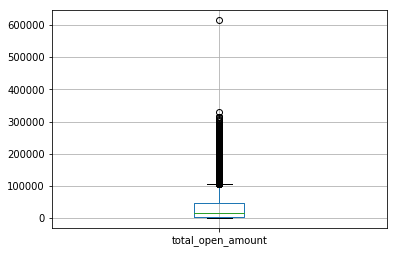

In [3554]:
train.boxplot(column=['total_open_amount'])

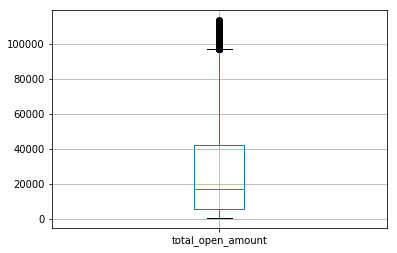

In [3555]:
upper_lim=Rest['total_open_amount'].quantile(.95)
lower_lim=Rest['total_open_amount'].quantile(.05)
train=train[(train['total_open_amount'] < upper_lim)& ( train['total_open_amount']> lower_lim)]
train.boxplot(column = ['total_open_amount'])

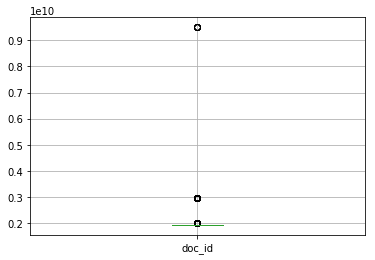

In [3556]:
train.boxplot(column=['doc_id'])

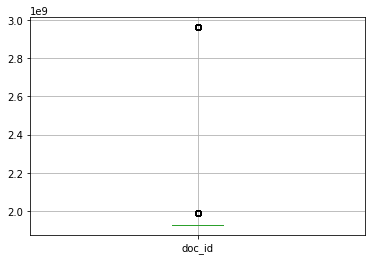

In [3557]:
upper_lim=Rest['doc_id'].quantile(.95)
lower_lim=Rest['doc_id'].quantile(.05)
train=train[(train['doc_id'] < upper_lim)& ( train['doc_id']> lower_lim)]
train.boxplot(column = ['doc_id'])

# FEATURE ENGINEERING

In [3558]:
train.head()

,index,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay
16,16621,U013,0140103335,PARAM corp,2019-01-23,2019.0,1.991819e+09,2018-12-30,2018-12-30,2019-01-29,USD,13760.5500,2018-12-30,NAVE,-6
42,6974,CA02,0140105847,GORDON F in,2019-01-17,2019.0,2.960520e+09,2018-12-30,2018-12-30,2019-01-10,USD,2213.0316,2018-12-31,CA10,7
63,887,U013,0100009932,SYSCO IN trust,2019-02-28,2019.0,1.991820e+09,2018-12-30,2018-12-30,2019-01-29,USD,28225.4800,2018-12-30,NAVE,30
81,29504,CA02,0140105686,SYSC in,2019-01-24,2019.0,2.960521e+09,2018-12-31,2018-12-31,2019-01-19,USD,53100.7152,2019-01-09,CA10,5
94,5534,U013,0140101602,LEOPOLDO associates,2019-02-13,2019.0,1.991820e+09,2018-12-31,2018-12-31,2019-01-30,USD,16078.4400,2018-12-31,NAVE,14


In [3559]:
train.shape

(25477, 15)

In [3560]:
train[train['due_in_date']<train['document_create_date.1']].shape

(74, 15)

#### Our train data has no rows where due_in_date is less than document_create_date.1

## Making new features from the existing ones

#### We will not be using clear_date for making any features as clear_date doesnt exist in our test data so we can drop the clear_date column. We can also drop name_customer and doc_id as these information isnt much required and can be derived from cust_number if relevant

In [3561]:
train.drop(columns=['clear_date','doc_id','name_customer'],inplace=True)

In [3562]:
train.head()

,index,business_code,cust_number,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay
16,16621,U013,0140103335,2019.0,2018-12-30,2018-12-30,2019-01-29,USD,13760.5500,2018-12-30,NAVE,-6
42,6974,CA02,0140105847,2019.0,2018-12-30,2018-12-30,2019-01-10,USD,2213.0316,2018-12-31,CA10,7
63,887,U013,0100009932,2019.0,2018-12-30,2018-12-30,2019-01-29,USD,28225.4800,2018-12-30,NAVE,30
81,29504,CA02,0140105686,2019.0,2018-12-31,2018-12-31,2019-01-19,USD,53100.7152,2019-01-09,CA10,5
94,5534,U013,0140101602,2019.0,2018-12-31,2018-12-31,2019-01-30,USD,16078.4400,2018-12-31,NAVE,14


### Creation of new Features

In [3563]:
#Making features from document_create_date.1 column
# creating day the document was created:

train['day_document_created'] = train['document_create_date.1'].dt.day
val2['day_document_created'] = val2['document_create_date.1'].dt.day
local_test['day_document_created'] = local_test['document_create_date.1'].dt.day
Test['day_document_created'] = Test['document_create_date.1'].dt.day

#creating the month the document was created in:

train['Month'] = train['document_create_date.1'].dt.month
val2['Month'] = val2['document_create_date.1'].dt.month
local_test['Month'] = local_test['document_create_date.1'].dt.month
Test['Month'] = Test['document_create_date.1'].dt.month

#creating year feature i.e the year the document was made:

train['Year'] = train['document_create_date.1'].dt.year
val2['Year'] = val2['document_create_date.1'].dt.year
local_test['Year'] = local_test['document_create_date.1'].dt.year
Test['Year'] = Test['document_create_date.1'].dt.year

train['quarter_of_document_creation'] =  train['document_create_date.1'].dt.quarter
val2['quarter_of_document_creation'] =  val2['document_create_date.1'].dt.quarter
local_test['quarter_of_document_creation'] =  local_test['document_create_date.1'].dt.quarter
Test['quarter_of_document_creation'] =  Test['document_create_date.1'].dt.quarter


In [3564]:
#We can drop the document_create_date.1 column as the required features have been taken out

train.drop(columns = ['document_create_date.1'],axis=1,inplace=True)
val2.drop(columns = ['document_create_date.1'],axis=1,inplace=True)
local_test.drop(columns = ['document_create_date.1'],axis=1,inplace=True)
Test.drop(columns = ['document_create_date.1'],axis=1,inplace=True)


In [3565]:
Test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,...,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,day_document_created,Month,Year,quarter_of_document_creation
45038,U001,0200769623,WAL-MAR us,NaT,2020.0,1.930798e+09,2020-04-17,2020-04-17,2020-05-02,USD,...,27374.14,2020-04-17,NAH4,1.930798e+09,1,NaN,17,4,2020,2
45039,U001,0200762301,C&S WH corporation,NaT,2020.0,1.930783e+09,2020-04-14,2020-04-14,2020-04-29,USD,...,32011.41,2020-04-14,NAC6,1.930783e+09,1,NaN,14,4,2020,2
45040,U002,0200816950,COLOM trust,NaT,2020.0,1.990573e+09,2020-03-27,2020-03-24,2020-04-26,USD,...,77241.34,2020-03-27,NA38,1.990573e+09,1,NaN,27,3,2020,1
45041,U001,0200769623,WAL-MAR corp,NaT,2020.0,1.930637e+09,2020-03-12,2020-03-10,2020-03-27,USD,...,12901.99,2020-03-12,NAH4,1.930637e+09,1,NaN,12,3,2020,1
45042,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930652e+09,2020-03-14,2020-03-14,2020-03-29,USD,...,55217.31,2020-03-14,NAH4,1.930652e+09,1,NaN,14,3,2020,1


In [3566]:
train.head() # doesnt contain document_create_date.1 column

,index,business_code,cust_number,buisness_year,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay,day_document_created,Month,Year,quarter_of_document_creation
16,16621,U013,0140103335,2019.0,2018-12-30,2019-01-29,USD,13760.5500,2018-12-30,NAVE,-6,30,12,2018,4
42,6974,CA02,0140105847,2019.0,2018-12-30,2019-01-10,USD,2213.0316,2018-12-31,CA10,7,30,12,2018,4
63,887,U013,0100009932,2019.0,2018-12-30,2019-01-29,USD,28225.4800,2018-12-30,NAVE,30,30,12,2018,4
81,29504,CA02,0140105686,2019.0,2018-12-31,2019-01-19,USD,53100.7152,2019-01-09,CA10,5,31,12,2018,4
94,5534,U013,0140101602,2019.0,2018-12-31,2019-01-30,USD,16078.4400,2018-12-31,NAVE,14,31,12,2018,4


In [3567]:
val2.head()  #doesnt contain document_create_date.1 column

,index,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay,day_document_created,Month,Year,quarter_of_document_creation
31526,24568,U001,0200769623,WAL-MAR us,2019-10-18,2019.0,1.929981e+09,2019-10-07,2019-10-22,USD,42159.94,2019-10-07,NAH4,0,-4,7,10,2019,4
31527,29308,U001,0200769623,WAL-MAR corp,2019-10-18,2019.0,1.929983e+09,2019-10-07,2019-10-22,USD,47068.24,2019-10-07,NAH4,0,-4,7,10,2019,4
31528,28985,U001,0200793568,SUPE trust,2019-10-22,2019.0,1.929976e+09,2019-10-07,2019-10-22,USD,1033.80,2019-10-07,NAA8,0,0,7,10,2019,4
31529,42154,U001,0200803720,DEC us,2019-10-10,2019.0,1.929977e+09,2019-10-07,2019-10-11,USD,2375.32,2019-10-01,NAM2,0,-1,7,10,2019,4
31530,18871,U001,0200790107,ROU llc,2019-10-23,2019.0,1.929989e+09,2019-10-07,2019-10-22,USD,52992.03,2019-10-07,NAC6,0,1,7,10,2019,4


In [3568]:
local_test.head() # doesnt contain document_create_date.1 column

,index,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay,day_document_created,Month,Year,quarter_of_document_creation
38282,44234,U001,0200761734,H E BUT in,2019-12-24,2019.0,1.930256e+09,2019-12-10,2019-12-25,USD,26354.13,2019-12-10,NAA8,0,-1,10,12,2019,4
38283,39903,U001,0200705089,JETR,2019-12-26,2019.0,1.930251e+09,2019-12-10,2019-12-25,USD,17111.84,2019-12-10,NAA8,0,1,10,12,2019,4
38284,984,U001,0200769623,WAL-MAR co,2019-12-23,2019.0,1.930252e+09,2019-12-10,2019-12-25,USD,12968.80,2019-12-10,NAH4,0,-2,10,12,2019,4
38285,10004,U001,0200769623,WAL-MAR corp,2019-12-27,2019.0,1.930254e+09,2019-12-10,2019-12-25,USD,5086.01,2019-12-10,NAH4,0,2,10,12,2019,4
38286,24218,U001,0200592182,DECA corporation,2019-12-11,2019.0,1.930257e+09,2019-12-10,2019-12-08,USD,6665.45,2019-12-01,NAM1,0,3,10,12,2019,4


## Encoding Categorical Variables to Numeric Variables

### Label encoding business_code

In [3569]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [3570]:
train["business_code"]  = label_encoder.fit_transform(train[['business_code']])
val2["business_code"]  = label_encoder.fit_transform(val2[['business_code']])
local_test["business_code"]  = label_encoder.fit_transform(local_test[['business_code']])
Test["business_code"]  = label_encoder.fit_transform(Test[['business_code']])


In [3571]:
train.head(20)

,index,business_code,cust_number,buisness_year,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay,day_document_created,Month,Year,quarter_of_document_creation
16,16621,5,0140103335,2019.0,2018-12-30,2019-01-29,USD,13760.5500,2018-12-30,NAVE,-6,30,12,2018,4
42,6974,0,0140105847,2019.0,2018-12-30,2019-01-10,USD,2213.0316,2018-12-31,CA10,7,30,12,2018,4
63,887,5,0100009932,2019.0,2018-12-30,2019-01-29,USD,28225.4800,2018-12-30,NAVE,30,30,12,2018,4
81,29504,0,0140105686,2019.0,2018-12-31,2019-01-19,USD,53100.7152,2019-01-09,CA10,5,31,12,2018,4
94,5534,5,0140101602,2019.0,2018-12-31,2019-01-30,USD,16078.4400,2018-12-31,NAVE,14,31,12,2018,4
121,8755,0,0140106408,2019.0,2018-12-31,2019-01-10,USD,9754.9140,2018-12-31,CA10,15,31,12,2018,4
123,2358,5,CC7470,2019.0,2018-12-31,2019-02-14,USD,18409.7300,2018-12-31,NAVF,99,31,12,2018,4
127,42347,0,0140104277,2019.0,2018-12-31,2019-01-19,USD,10269.9090,2019-01-09,CA10,-1,31,12,2018,4
145,16846,5,0140103293,2019.0,2019-01-01,2019-01-31,USD,28599.9700,2019-01-01,NAVE,98,1,1,2019,1
149,18215,5,0140103278,2019.0,2019-01-01,2019-03-02,USD,8407.5200,2019-01-01,NAUZ,5,1,1,2019,1


In [3572]:
Test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,...,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,day_document_created,Month,Year,quarter_of_document_creation
45038,1,0200769623,WAL-MAR us,NaT,2020.0,1.930798e+09,2020-04-17,2020-04-17,2020-05-02,USD,...,27374.14,2020-04-17,NAH4,1.930798e+09,1,NaN,17,4,2020,2
45039,1,0200762301,C&S WH corporation,NaT,2020.0,1.930783e+09,2020-04-14,2020-04-14,2020-04-29,USD,...,32011.41,2020-04-14,NAC6,1.930783e+09,1,NaN,14,4,2020,2
45040,2,0200816950,COLOM trust,NaT,2020.0,1.990573e+09,2020-03-27,2020-03-24,2020-04-26,USD,...,77241.34,2020-03-27,NA38,1.990573e+09,1,NaN,27,3,2020,1
45041,1,0200769623,WAL-MAR corp,NaT,2020.0,1.930637e+09,2020-03-12,2020-03-10,2020-03-27,USD,...,12901.99,2020-03-12,NAH4,1.930637e+09,1,NaN,12,3,2020,1
45042,1,0200769623,WAL-MAR in,NaT,2020.0,1.930652e+09,2020-03-14,2020-03-14,2020-03-29,USD,...,55217.31,2020-03-14,NAH4,1.930652e+09,1,NaN,14,3,2020,1


###  target encoding cust_payment_terms

In [3573]:
train['cust_payment_terms'].unique()

array(['NAVE', 'CA10', 'NAVF', 'NAUZ', 'NAG2', 'NAA8', 'CA30', 'NA38',
       'NAVM', 'NAU5', 'NAH4', 'NAAW', 'NAD1', 'NAC6', 'NA10', 'NA32',
       'NA9X', 'NAAX', 'NA8Q', 'NAM4', 'NAM1', 'NAM2', 'NAD5', 'NAWP',
       'NAX2', 'NAB1', 'NAGD', 'NAVQ', 'NA84', 'NACB', 'NABG', 'NAUP',
       'NA3F', 'C106', 'NAVL', 'NAD4', 'NANC', 'C129', 'NA3B', 'CAB1',
       'NAD8', 'NATH', 'NAVC', 'NA25', 'NA31', 'NAUY', 'NAVD', 'NATJ',
       'NAV2', 'BR56', 'CA60', 'NATK', 'NAVR', 'BR12', 'NAWN', 'B052',
       'NATL', 'B112', 'NATM', 'NAUI', 'NATV', 'NATU', 'NAWU'],
      dtype=object)

In [3574]:
# we will now check the cust_payment_terms column
train['cust_payment_terms']

16       NAVE
42       CA10
63       NAVE
81       CA10
94       NAVE
121      CA10
123      NAVF
127      CA10
145      NAVE
149      NAUZ
170      NAG2
183      CA10
190      CA10
192      CA10
194      CA10
213      CA10
222      CA10
225      CA10
231      NAVE
255      CA10
256      CA10
257      CA10
275      NAVF
293      CA10
339      CA10
343      CA10
361      CA10
380      NAVF
382      CA10
399      CA10
         ... 
31488    NAA8
31490    NAH4
31491    NAH4
31492    NAA8
31493    NAA8
31494    NAH4
31495    NAA8
31496    NAA8
31498    NAH4
31500    NAA8
31502    NAC6
31503    NA32
31504    NAA8
31506    NAH4
31507    NAA8
31508    NAA8
31510    NAH4
31511    NAH4
31512    NAVQ
31513    NAA8
31514    NAA8
31515    NAA8
31516    NAA8
31517    NAA8
31518    NAA8
31519    NAA8
31521    NAA8
31522    NAA8
31523    NAH4
31524    NAA8
Name: cust_payment_terms, Length: 25477, dtype: object

In [3575]:
from category_encoders import TargetEncoder
targ_enc = TargetEncoder(cols=['cust_payment_terms'], smoothing=8, min_samples_leaf=5).fit(train['cust_payment_terms'], train['delay'])

In [3576]:
values = targ_enc.transform(train['cust_payment_terms'].reset_index(drop=True))

In [3577]:
map_values = list(values['cust_payment_terms'])
map_keys = list(train['cust_payment_terms'])

In [3578]:
res = dict(zip(map_keys, map_values)) 
res

{'NAVE': 0.22105263163891084,
 'CA10': 6.4953271028037385,
 'NAVF': 22.353293378709242,
 'NAUZ': 1.597424065272112,
 'NAG2': 7.840830449826989,
 'NAA8': 1.3841311082242431,
 'CA30': -2.317901127440346,
 'NA38': 0.33156069836177404,
 'NAVM': 5.343195792586972,
 'NAU5': 1.5658747300215983,
 'NAH4': -1.819306594153637,
 'NAAW': -14.276920594641439,
 'NAD1': 0.2950191570881226,
 'NAC6': 0.5502283105022832,
 'NA10': 2.2616033755270752,
 'NA32': -3.4675615212527964,
 'NA9X': -2.327897321710745,
 'NAAX': -0.05239520958083832,
 'NA8Q': 16.341594379244025,
 'NAM4': -7.346715328467154,
 'NAM1': 2.1360543972680666,
 'NAM2': -0.41042345276872966,
 'NAD5': 12.343137254721613,
 'NAWP': -7.699472185331277,
 'NAX2': 43.70100502512563,
 'NAB1': 5.6158865925657855,
 'NAGD': -11.542801556420233,
 'NAVQ': -0.8291551812217257,
 'NA84': -0.8423168399378107,
 'NACB': 5.854514203055718,
 'NABG': -5.109748233310374,
 'NAUP': 2.629599454432254,
 'NA3F': 5.861053567968892,
 'C106': 1.1746688548141264,
 'NAVL': -

In [3579]:
# Here we are mapping the cust_payment_terms after target encoding to train,val2,local_test and Test
train['cust_payment_terms'] = train['cust_payment_terms'].map(res)
val2['cust_payment_terms'] = val2['cust_payment_terms'].map(res)
local_test['cust_payment_terms'] = local_test['cust_payment_terms'].map(res)
Test['cust_payment_terms'] =Test['cust_payment_terms'].map(res)



In [3580]:
#We are doing this so that if any null values are there we can get the mean
Test['cust_payment_terms'][Test['cust_payment_terms'].isnull()]= train['cust_payment_terms'].mean()

In [3581]:
Test.isna().sum()

business_code                      0
cust_number                        0
name_customer                      0
clear_date                      4962
buisness_year                      0
doc_id                             0
posting_date                       0
document_create_date               0
due_in_date                        0
invoice_currency                   0
document type                      0
posting_id                         0
area_business                   4962
total_open_amount                  0
baseline_create_date               0
cust_payment_terms                 0
invoice_id                         0
isOpen                             0
delay                           4962
day_document_created               0
Month                              0
Year                               0
quarter_of_document_creation       0
dtype: int64

In [3582]:
Test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,...,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,day_document_created,Month,Year,quarter_of_document_creation
45038,1,0200769623,WAL-MAR us,NaT,2020.0,1.930798e+09,2020-04-17,2020-04-17,2020-05-02,USD,...,27374.14,2020-04-17,-1.819307,1.930798e+09,1,NaN,17,4,2020,2
45039,1,0200762301,C&S WH corporation,NaT,2020.0,1.930783e+09,2020-04-14,2020-04-14,2020-04-29,USD,...,32011.41,2020-04-14,0.550228,1.930783e+09,1,NaN,14,4,2020,2
45040,2,0200816950,COLOM trust,NaT,2020.0,1.990573e+09,2020-03-27,2020-03-24,2020-04-26,USD,...,77241.34,2020-03-27,0.331561,1.990573e+09,1,NaN,27,3,2020,1
45041,1,0200769623,WAL-MAR corp,NaT,2020.0,1.930637e+09,2020-03-12,2020-03-10,2020-03-27,USD,...,12901.99,2020-03-12,-1.819307,1.930637e+09,1,NaN,12,3,2020,1
45042,1,0200769623,WAL-MAR in,NaT,2020.0,1.930652e+09,2020-03-14,2020-03-14,2020-03-29,USD,...,55217.31,2020-03-14,-1.819307,1.930652e+09,1,NaN,14,3,2020,1


In [3583]:
train.head(20)

,index,business_code,cust_number,buisness_year,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay,day_document_created,Month,Year,quarter_of_document_creation
16,16621,5,0140103335,2019.0,2018-12-30,2019-01-29,USD,13760.5500,2018-12-30,0.221053,-6,30,12,2018,4
42,6974,0,0140105847,2019.0,2018-12-30,2019-01-10,USD,2213.0316,2018-12-31,6.495327,7,30,12,2018,4
63,887,5,0100009932,2019.0,2018-12-30,2019-01-29,USD,28225.4800,2018-12-30,0.221053,30,30,12,2018,4
81,29504,0,0140105686,2019.0,2018-12-31,2019-01-19,USD,53100.7152,2019-01-09,6.495327,5,31,12,2018,4
94,5534,5,0140101602,2019.0,2018-12-31,2019-01-30,USD,16078.4400,2018-12-31,0.221053,14,31,12,2018,4
121,8755,0,0140106408,2019.0,2018-12-31,2019-01-10,USD,9754.9140,2018-12-31,6.495327,15,31,12,2018,4
123,2358,5,CC7470,2019.0,2018-12-31,2019-02-14,USD,18409.7300,2018-12-31,22.353293,99,31,12,2018,4
127,42347,0,0140104277,2019.0,2018-12-31,2019-01-19,USD,10269.9090,2019-01-09,6.495327,-1,31,12,2018,4
145,16846,5,0140103293,2019.0,2019-01-01,2019-01-31,USD,28599.9700,2019-01-01,0.221053,98,1,1,2019,1
149,18215,5,0140103278,2019.0,2019-01-01,2019-03-02,USD,8407.5200,2019-01-01,1.597424,5,1,1,2019,1


In [3584]:
train['cust_payment_terms'].unique()

array([  0.22105263,   6.4953271 ,  22.35329338,   1.59742407,
         7.84083045,   1.38413111,  -2.31790113,   0.3315607 ,
         5.34319579,   1.56587473,  -1.81930659, -14.27692059,
         0.29501916,   0.55022831,   2.26160338,  -3.46756152,
        -2.32789732,  -0.05239521,  16.34159438,  -7.34671533,
         2.1360544 ,  -0.41042345,  12.34313725,  -7.69947219,
        43.70100503,   5.61588659, -11.54280156,  -0.82915518,
        -0.84231684,   5.8545142 ,  -5.10974823,   2.62959945,
         5.86105357,   1.17466885,  -2.96433318,   1.75833237,
         1.87553003,   0.88318876,  -3.3165898 ,   1.74543668,
         0.93794877,   1.80997846,   0.85670509,  -1.92056392,
        -0.45840562,   0.93076988,   1.18979008, -15.07135909,
       -11.16193276,   0.94523998,  -3.69935726])

# Target encoding cust_number

In [3585]:
from category_encoders import TargetEncoder
targ_enc = TargetEncoder(cols=['cust_number'], smoothing=8, min_samples_leaf=5).fit(train['cust_number'], train['delay'])

In [3586]:
values1 = targ_enc.transform(train['cust_number'].reset_index(drop=True))

In [3587]:
map_values1 = list(values1['cust_number'])
map_keys1 = list(train['cust_number'])

In [3588]:
res1 = dict(zip(map_keys1, map_values1)) 
res1

{'0140103335': -1.7402009112447965,
 '0140105847': 4.750798896433909,
 '0100009932': 3.4991720062411833,
 '0140105686': 5.770777229194571,
 '0140101602': 4.393103779047105,
 '0140106408': 11.553956267297286,
 'CC7470': 0.883188758488048,
 '0140104277': 2.6959136234418395,
 '0140103293': 4.0497003708898935,
 '0140103278': 0.4894705902770569,
 '0200501669': 5.995329191482884,
 '0140106372': 1.9808195737019425,
 '0100012991': 1.6716556517871033,
 '0140104472': 3.342625773406844,
 '0140104409': 3.2540973053993145,
 '0140103392': -1.356667299724988,
 'CC6000': 30.710135930243588,
 '0140105713': 0.3197697785878022,
 '0140104429': 3.896296032220096,
 'CC6600': 22.53030691310974,
 '0140105508': -1.299848710037829,
 '0140104440': 5.6653541805600725,
 '0140104423': 0.3609170906218064,
 '0140104225': 0.8033479383706451,
 '0200978592': 5.535294315540245,
 '0140104249': 5.138404840582475,
 '0100034330': 3.9298713659430744,
 '0100050491': 1.745436678748558,
 '0100043903': -2.7141976943023307,
 '1401

In [3589]:
#Mapping cust_number to train,val2,local_test and Test
train['cust_number'] = train['cust_number'].map(res1)
val1['cust_number'] = val1['cust_number'].map(res1)
local_test['cust_number'] = local_test['cust_number'].map(res1)
Test['cust_number'] =Test['cust_number'].map(res1)

In [3590]:
train.head(20)

,index,business_code,cust_number,buisness_year,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay,day_document_created,Month,Year,quarter_of_document_creation
16,16621,5,-1.740201,2019.0,2018-12-30,2019-01-29,USD,13760.5500,2018-12-30,0.221053,-6,30,12,2018,4
42,6974,0,4.750799,2019.0,2018-12-30,2019-01-10,USD,2213.0316,2018-12-31,6.495327,7,30,12,2018,4
63,887,5,3.499172,2019.0,2018-12-30,2019-01-29,USD,28225.4800,2018-12-30,0.221053,30,30,12,2018,4
81,29504,0,5.770777,2019.0,2018-12-31,2019-01-19,USD,53100.7152,2019-01-09,6.495327,5,31,12,2018,4
94,5534,5,4.393104,2019.0,2018-12-31,2019-01-30,USD,16078.4400,2018-12-31,0.221053,14,31,12,2018,4
121,8755,0,11.553956,2019.0,2018-12-31,2019-01-10,USD,9754.9140,2018-12-31,6.495327,15,31,12,2018,4
123,2358,5,0.883189,2019.0,2018-12-31,2019-02-14,USD,18409.7300,2018-12-31,22.353293,99,31,12,2018,4
127,42347,0,2.695914,2019.0,2018-12-31,2019-01-19,USD,10269.9090,2019-01-09,6.495327,-1,31,12,2018,4
145,16846,5,4.049700,2019.0,2019-01-01,2019-01-31,USD,28599.9700,2019-01-01,0.221053,98,1,1,2019,1
149,18215,5,0.489471,2019.0,2019-01-01,2019-03-02,USD,8407.5200,2019-01-01,1.597424,5,1,1,2019,1


In [3591]:
train["cust_number"].unique()

array([-1.74020091e+00,  4.75079890e+00,  3.49917201e+00,  5.77077723e+00,
        4.39310378e+00,  1.15539563e+01,  8.83188758e-01,  2.69591362e+00,
        4.04970037e+00,  4.89470590e-01,  5.99532919e+00,  1.98081957e+00,
        1.67165565e+00,  3.34262577e+00,  3.25409731e+00, -1.35666730e+00,
        3.07101359e+01,  3.19769779e-01,  3.89629603e+00,  2.25303069e+01,
       -1.29984871e+00,  5.66535418e+00,  3.60917091e-01,  8.03347938e-01,
        5.53529432e+00,  5.13840484e+00,  3.92987137e+00,  1.74543668e+00,
       -2.71419769e+00,  2.66199767e+01,  3.11725237e+00,  6.33415462e+00,
        3.04750659e+00,  7.98129619e+00,  1.37215496e+00,  2.86676099e+00,
        7.88390299e-01,  7.41594379e-01,  3.37477028e+00, -6.71021365e-01,
        1.95591963e+00,  2.07321030e+00,  5.81465924e+00,  1.09422330e+00,
       -3.19624732e+00,  9.07630522e-01,  5.95381101e+01, -5.15477329e+00,
       -1.15840562e+00,  4.22103112e+00, -6.08365688e-01,  1.67576468e+00,
        3.51960490e-01, -

#### We check the Test data again and again to see if there are any errors or not

In [3592]:
Test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,...,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,day_document_created,Month,Year,quarter_of_document_creation
45038,1,-2.142905,WAL-MAR us,NaT,2020.0,1.930798e+09,2020-04-17,2020-04-17,2020-05-02,USD,...,27374.14,2020-04-17,-1.819307,1.930798e+09,1,NaN,17,4,2020,2
45039,1,0.404539,C&S WH corporation,NaT,2020.0,1.930783e+09,2020-04-14,2020-04-14,2020-04-29,USD,...,32011.41,2020-04-14,0.550228,1.930783e+09,1,NaN,14,4,2020,2
45040,2,0.083401,COLOM trust,NaT,2020.0,1.990573e+09,2020-03-27,2020-03-24,2020-04-26,USD,...,77241.34,2020-03-27,0.331561,1.990573e+09,1,NaN,27,3,2020,1
45041,1,-2.142905,WAL-MAR corp,NaT,2020.0,1.930637e+09,2020-03-12,2020-03-10,2020-03-27,USD,...,12901.99,2020-03-12,-1.819307,1.930637e+09,1,NaN,12,3,2020,1
45042,1,-2.142905,WAL-MAR in,NaT,2020.0,1.930652e+09,2020-03-14,2020-03-14,2020-03-29,USD,...,55217.31,2020-03-14,-1.819307,1.930652e+09,1,NaN,14,3,2020,1


# Feature Selection

### The number of features created arent many so we can use Filter Method

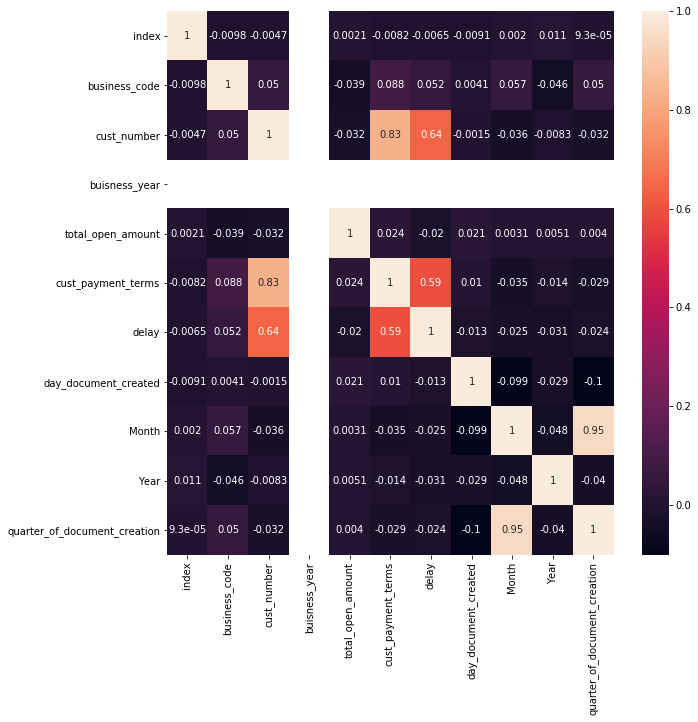

In [3593]:
#applying Pearson correlation to find correlation between the columns # filter
plt.figure(figsize=(10,10))
cor=train.corr()
sns.heatmap(cor , annot=True)
plt.show()

In [3594]:
#Matrix representation of the above visualized correlated features
corrmatrix = train.corr()
corr_features=set()
corrmatrix

,index,business_code,cust_number,buisness_year,total_open_amount,cust_payment_terms,delay,day_document_created,Month,Year,quarter_of_document_creation
index,1.000000,-0.009759,-0.004740,NaN,0.002087,-0.008235,-0.006536,-0.009099,0.002043,0.011490,0.000093
business_code,-0.009759,1.000000,0.049727,NaN,-0.038661,0.088299,0.051594,0.004138,0.057198,-0.045945,0.049898
cust_number,-0.004740,0.049727,1.000000,NaN,-0.032183,0.833960,0.639206,-0.001479,-0.036411,-0.008306,-0.032336
buisness_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_open_amount,0.002087,-0.038661,-0.032183,NaN,1.000000,0.024022,-0.020419,0.020580,0.003123,0.005099,0.003957
cust_payment_terms,-0.008235,0.088299,0.833960,NaN,0.024022,1.000000,0.594301,0.010281,-0.034586,-0.013853,-0.029025
delay,-0.006536,0.051594,0.639206,NaN,-0.020419,0.594301,1.000000,-0.012712,-0.024950,-0.030524,-0.023783
day_document_created,-0.009099,0.004138,-0.001479,NaN,0.020580,0.010281,-0.012712,1.000000,-0.098518,-0.029373,-0.101402
Month,0.002043,0.057198,-0.036411,NaN,0.003123,-0.034586,-0.024950,-0.098518,1.000000,-0.047885,0.947865
Year,0.011490,-0.045945,-0.008306,NaN,0.005099,-0.013853,-0.030524,-0.029373,-0.047885,1.000000,-0.040082


In [3595]:
train.shape

(25477, 15)

In [3596]:
train.head()

,index,business_code,cust_number,buisness_year,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay,day_document_created,Month,Year,quarter_of_document_creation
16,16621,5,-1.740201,2019.0,2018-12-30,2019-01-29,USD,13760.5500,2018-12-30,0.221053,-6,30,12,2018,4
42,6974,0,4.750799,2019.0,2018-12-30,2019-01-10,USD,2213.0316,2018-12-31,6.495327,7,30,12,2018,4
63,887,5,3.499172,2019.0,2018-12-30,2019-01-29,USD,28225.4800,2018-12-30,0.221053,30,30,12,2018,4
81,29504,0,5.770777,2019.0,2018-12-31,2019-01-19,USD,53100.7152,2019-01-09,6.495327,5,31,12,2018,4
94,5534,5,4.393104,2019.0,2018-12-31,2019-01-30,USD,16078.4400,2018-12-31,0.221053,14,31,12,2018,4


#### there are 2 types of correlated features: One where the features are correlated with the target itself and hence cant be deleted and Two when the features are correlated among themseleves and not with the target and so they can be deleted

In [3597]:
for i in range(len(corrmatrix.columns)):
    for j in range(i):
        if abs(corrmatrix.iloc[i,j]) > 0.42:
            colname=corrmatrix.columns[i]
            corr_features.add(colname)
        
    

In [3598]:
print(corr_features)

{'quarter_of_document_creation', 'cust_payment_terms', 'delay'}


#### Here we see our features are correlated to delay which is the target column so we dont have to delete those

### Checking for Quasi Constant

In [3599]:
#To find all numerical column/feature
num_col = train._get_numeric_data().columns
num_col

Index(['index', 'business_code', 'cust_number', 'buisness_year',
       'total_open_amount', 'cust_payment_terms', 'delay',
       'day_document_created', 'Month', 'Year',
       'quarter_of_document_creation'],
      dtype='object')

In [3600]:
train_copy = train[num_col]
train_copy.head()

,index,business_code,cust_number,buisness_year,total_open_amount,cust_payment_terms,delay,day_document_created,Month,Year,quarter_of_document_creation
16,16621,5,-1.740201,2019.0,13760.5500,0.221053,-6,30,12,2018,4
42,6974,0,4.750799,2019.0,2213.0316,6.495327,7,30,12,2018,4
63,887,5,3.499172,2019.0,28225.4800,0.221053,30,30,12,2018,4
81,29504,0,5.770777,2019.0,53100.7152,6.495327,5,31,12,2018,4
94,5534,5,4.393104,2019.0,16078.4400,0.221053,14,31,12,2018,4


In [3601]:
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=0.1)

In [3602]:
vt.fit(train_copy)

VarianceThreshold(threshold=0.1)

In [3603]:
train_copy.columns[list(vt.get_support())]

Index(['index', 'business_code', 'cust_number', 'total_open_amount',
       'cust_payment_terms', 'delay', 'day_document_created', 'Month',
       'quarter_of_document_creation'],
      dtype='object')

In [3604]:
train.shape

(25477, 15)

In [3609]:
local_test.head()

,index,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay,day_document_created,Month,Year,quarter_of_document_creation
38282,44234,1,-2.509901,H E BUT in,2019-12-24,2019.0,1.930256e+09,2019-12-10,2019-12-25,USD,26354.13,2019-12-10,1.384131,0,-1,10,12,2019,4
38283,39903,1,0.680730,JETR,2019-12-26,2019.0,1.930251e+09,2019-12-10,2019-12-25,USD,17111.84,2019-12-10,1.384131,0,1,10,12,2019,4
38284,984,1,-2.142905,WAL-MAR co,2019-12-23,2019.0,1.930252e+09,2019-12-10,2019-12-25,USD,12968.80,2019-12-10,-1.819307,0,-2,10,12,2019,4
38285,10004,1,-2.142905,WAL-MAR corp,2019-12-27,2019.0,1.930254e+09,2019-12-10,2019-12-25,USD,5086.01,2019-12-10,-1.819307,0,2,10,12,2019,4
38286,24218,1,-3.999989,DECA corporation,2019-12-11,2019.0,1.930257e+09,2019-12-10,2019-12-08,USD,6665.45,2019-12-01,2.136054,0,3,10,12,2019,4


#### We can drop name_customer and doc_id as cust_number is enough to provide the same information.
#### Dropping invoice_currency as it has the same info as total_open_amount
#### Dropping few features as they are not correlated strongly with the target variable

In [3610]:
train=train.drop(["invoice_currency"],axis=1)
val2.drop(labels =['index','name_customer','clear_date','baseline_create_date','doc_id','posting_date','due_in_date','invoice_currency','isOpen','buisness_year','Month','Year'],axis=1,inplace=True)
local_test.drop(labels =['index','name_customer','clear_date','baseline_create_date','doc_id','posting_date','due_in_date','invoice_currency','isOpen','buisness_year','Month','Year'],axis=1,inplace=True)
Test.drop(labels =['name_customer','clear_date','baseline_create_date','doc_id','posting_date','due_in_date','invoice_currency','isOpen','buisness_year','Month','Year'],axis=1,inplace=True)

In [3612]:
Test.shape

(4962, 12)

In [3613]:
#Checking if the above deleted columns are absent or not
Test.columns

Index(['business_code', 'cust_number', 'document_create_date', 'document type',
       'posting_id', 'area_business', 'total_open_amount',
       'cust_payment_terms', 'invoice_id', 'delay', 'day_document_created',
       'quarter_of_document_creation'],
      dtype='object')

In [3614]:
Test.head()

,business_code,cust_number,document_create_date,document type,posting_id,area_business,total_open_amount,cust_payment_terms,invoice_id,delay,day_document_created,quarter_of_document_creation
45038,1,-2.142905,2020-04-17,RV,1.0,NaN,27374.14,-1.819307,1.930798e+09,NaN,17,2
45039,1,0.404539,2020-04-14,RV,1.0,NaN,32011.41,0.550228,1.930783e+09,NaN,14,2
45040,2,0.083401,2020-03-24,RV,1.0,NaN,77241.34,0.331561,1.990573e+09,NaN,27,1
45041,1,-2.142905,2020-03-10,RV,1.0,NaN,12901.99,-1.819307,1.930637e+09,NaN,12,1
45042,1,-2.142905,2020-03-14,RV,1.0,NaN,55217.31,-1.819307,1.930652e+09,NaN,14,1


### CHECKING FOR SKEWNESS

In [3615]:
#we will remove skewness
from scipy import stats

In [3616]:
#Before Skewing
train.skew()

index                           -0.009422
business_code                    5.653097
cust_number                      4.933180
buisness_year                    0.000000
total_open_amount                1.218814
cust_payment_terms               4.047976
delay                            3.922657
day_document_created             0.003697
Month                            0.063874
Year                           -56.409219
quarter_of_document_creation     0.060329
dtype: float64

In [3617]:
train['total_open_amount'] = stats.boxcox(train['total_open_amount'])[0]
train['cust_payment_terms'] = np.log(train['cust_payment_terms'])
train['cust_number'] = np.log(train['cust_number'])
train['delay'] = np.sqrt(train['delay'])
train['business_code'] = np.sqrt(train['business_code'])

In [3618]:
val2.skew()

business_code                   0.644912
total_open_amount               2.537282
cust_payment_terms              4.745073
delay                           2.255721
day_document_created            0.133265
quarter_of_document_creation    0.000000
dtype: float64

In [3619]:
val2['total_open_amount'] = stats.boxcox(val2['total_open_amount'])[0]
#val2['cust_payment_terms'] = np.log(val2['cust_payment_terms'])
#val2['cust_number'] = np.log(val2['cust_number'])
val2['delay'] = np.sqrt(val2['delay'])
val2['business_code'] = np.sqrt(val2['business_code'])

In [3620]:
local_test.skew()

business_code                   3.468965
cust_number                     5.366884
total_open_amount               2.187911
cust_payment_terms              4.204846
delay                           1.969309
day_document_created            0.120273
quarter_of_document_creation    1.905723
dtype: float64

In [3621]:
local_test['total_open_amount'] = stats.boxcox(local_test['total_open_amount'])[0]
local_test['cust_payment_terms'] = np.log(local_test['cust_payment_terms'])
local_test['cust_number'] = np.log(local_test['cust_number'])
local_test['delay'] = np.sqrt(local_test['delay'])
local_test['business_code'] = np.sqrt(local_test['business_code'])

In [3622]:
Test.skew()

business_code                   2.728135
cust_number                     5.829455
posting_id                      0.000000
area_business                        NaN
total_open_amount               1.844960
cust_payment_terms              3.871856
invoice_id                      3.237365
delay                                NaN
day_document_created            0.082831
quarter_of_document_creation    0.031452
dtype: float64

In [3623]:
Test['total_open_amount'] = stats.boxcox(Test['total_open_amount'])[0]
Test['cust_payment_terms'] = np.log(Test['cust_payment_terms'])
Test['cust_number'] = np.log(Test['cust_number'])
#Test['delay'] = np.sqrt(Test['delay'])
Test['business_code'] = np.sqrt(Test['business_code'])

In [3624]:
Test.head()

,business_code,cust_number,document_create_date,document type,posting_id,area_business,total_open_amount,cust_payment_terms,invoice_id,delay,day_document_created,quarter_of_document_creation
45038,1.000000,NaN,2020-04-17,RV,1.0,NaN,49.986754,NaN,1.930798e+09,NaN,17,2
45039,1.000000,-0.905006,2020-04-14,RV,1.0,NaN,52.200513,-0.597422,1.930783e+09,NaN,14,2
45040,1.414214,-2.484094,2020-03-24,RV,1.0,NaN,66.469613,-1.103944,1.990573e+09,NaN,27,1
45041,1.000000,NaN,2020-03-10,RV,1.0,NaN,40.505888,NaN,1.930637e+09,NaN,12,1
45042,1.000000,NaN,2020-03-14,RV,1.0,NaN,60.647703,NaN,1.930652e+09,NaN,14,1


In [3675]:
# here we see that we have finally removed skewness from the data after skewing
train.skew()

index                           -0.011801
business_code                   -0.521191
cust_number                      0.307073
buisness_year                    0.000000
total_open_amount               -0.223570
cust_payment_terms               1.298657
delay                            2.024019
day_document_created             0.018899
Month                            0.077203
Year                           -42.152499
quarter_of_document_creation     0.080262
dtype: float64

In [3626]:
#If null values present,removing them
train.dropna(inplace=True)
local_test.dropna(inplace=True)
val2.dropna(inplace=True)

In [3627]:
val2.head()

,business_code,cust_number,total_open_amount,cust_payment_terms,delay,day_document_created,quarter_of_document_creation
31528,1.000000,0200793568,17.600357,1.384131,0.0,7,4
31530,1.000000,0200790107,51.149395,0.550228,1.0,7,4
31531,0.000000,0140106408,28.072015,6.495327,2.0,7,4
31532,1.732051,0100024102,48.903716,0.221053,1.0,7,4
31533,1.000000,0200749782,22.365017,1.384131,0.0,7,4


In [3628]:

X_train = train.drop(labels = ['delay'],axis = 1,inplace = False)
Y_train = train['delay']

X_local_test = local_test.drop(labels = ['delay'],axis = 1,inplace = False)
Y_local_test = local_test['delay']

X_Test = Test.drop(labels = ['delay'],axis = 1,inplace = False)
Y_Test = Test['delay']


In [3629]:
X_train.head()

,index,business_code,cust_number,buisness_year,posting_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,day_document_created,Month,Year,quarter_of_document_creation
42,6974,0.000000,1.558313,2019.0,2018-12-30,2019-01-10,22.619492,2018-12-31,1.871083,30,12,2018,4
63,887,2.236068,1.252526,2019.0,2018-12-30,2019-01-29,45.506207,2018-12-30,-1.509354,30,12,2018,4
81,29504,0.000000,1.752807,2019.0,2018-12-31,2019-01-19,53.739934,2019-01-09,1.871083,31,12,2018,4
94,5534,2.236068,1.480036,2019.0,2018-12-31,2019-01-30,39.165942,2018-12-31,-1.509354,31,12,2018,4
121,8755,0.000000,2.447028,2019.0,2018-12-31,2019-01-10,34.218318,2018-12-31,1.871083,31,12,2018,4


In [3630]:
Test.head()

,business_code,cust_number,document_create_date,document type,posting_id,area_business,total_open_amount,cust_payment_terms,invoice_id,delay,day_document_created,quarter_of_document_creation
45038,1.000000,NaN,2020-04-17,RV,1.0,NaN,49.986754,NaN,1.930798e+09,NaN,17,2
45039,1.000000,-0.905006,2020-04-14,RV,1.0,NaN,52.200513,-0.597422,1.930783e+09,NaN,14,2
45040,1.414214,-2.484094,2020-03-24,RV,1.0,NaN,66.469613,-1.103944,1.990573e+09,NaN,27,1
45041,1.000000,NaN,2020-03-10,RV,1.0,NaN,40.505888,NaN,1.930637e+09,NaN,12,1
45042,1.000000,NaN,2020-03-14,RV,1.0,NaN,60.647703,NaN,1.930652e+09,NaN,14,1


# MODELLING

In [3631]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Defining lists to store in the results and name of algorithm

In [3632]:
MSE_Score = []
R2_Score =[]
Algorithm = []
RMSE_Score = []

In [3633]:
#Just checking the columns in X_local_test
X_local_test.columns

Index(['business_code', 'cust_number', 'total_open_amount',
       'cust_payment_terms', 'day_document_created',
       'quarter_of_document_creation'],
      dtype='object')

In [3634]:
X_train.head()

,index,business_code,cust_number,buisness_year,posting_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,day_document_created,Month,Year,quarter_of_document_creation
42,6974,0.000000,1.558313,2019.0,2018-12-30,2019-01-10,22.619492,2018-12-31,1.871083,30,12,2018,4
63,887,2.236068,1.252526,2019.0,2018-12-30,2019-01-29,45.506207,2018-12-30,-1.509354,30,12,2018,4
81,29504,0.000000,1.752807,2019.0,2018-12-31,2019-01-19,53.739934,2019-01-09,1.871083,31,12,2018,4
94,5534,2.236068,1.480036,2019.0,2018-12-31,2019-01-30,39.165942,2018-12-31,-1.509354,31,12,2018,4
121,8755,0.000000,2.447028,2019.0,2018-12-31,2019-01-10,34.218318,2018-12-31,1.871083,31,12,2018,4


In [3635]:
#Dropping those columns which are not numeric and not required
X_train.drop(['index', 'posting_date', 'buisness_year', 'due_in_date', 'baseline_create_date', 'Month', 'Year'], axis=1, inplace=True)

In [3636]:
X_train.head()

,business_code,cust_number,total_open_amount,cust_payment_terms,day_document_created,quarter_of_document_creation
42,0.000000,1.558313,22.619492,1.871083,30,4
63,2.236068,1.252526,45.506207,-1.509354,30,4
81,0.000000,1.752807,53.739934,1.871083,31,4
94,2.236068,1.480036,39.165942,-1.509354,31,4
121,0.000000,2.447028,34.218318,1.871083,31,4


In [3637]:
X_local_test.head()

,business_code,cust_number,total_open_amount,cust_payment_terms,day_document_created,quarter_of_document_creation
38283,1.0,-0.384589,37.557300,0.325073,10,4
38293,1.0,0.692494,39.129804,0.325073,10,4
38298,1.0,0.507703,14.419034,0.448445,10,4
38301,1.0,-0.475648,53.217734,-0.597422,10,4
38302,1.0,-1.272056,37.067775,0.325073,10,4


## LINEAR REGRESSION

In [3638]:
# Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(X_train, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_local_test)

In [3639]:
MSE_Score.append(mean_squared_error(Y_local_test,predicted))
R2_Score.append(r2_score(Y_local_test,predicted))
RMSE_Score.append(np.sqrt(mean_squared_error(Y_local_test,predicted)))

In [3640]:
predicted

array([0.89399083, 1.48474389, 1.67346842, ..., 0.14509181, 2.65674192,
       1.85375344])

In [3641]:
print(MSE_Score)
print(RMSE_Score)
print(R2_Score)

[1.5107842907016695]
[1.2291396546778846]
[0.4410242414535569]


## RANDOM FOREST REGRESSOR

In [3642]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(X_train, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_local_test)

In [3643]:
MSE_Score.append(mean_squared_error(Y_local_test, predicted))
R2_Score.append(r2_score(Y_local_test, predicted))
RMSE_Score.append(np.sqrt(mean_squared_error(Y_local_test,predicted)))

In [3644]:
print(MSE_Score)
print(RMSE_Score)
print(R2_Score)

[1.5107842907016695, 1.301513415074136]
[1.2291396546778846, 1.140838908467859]
[0.4410242414535569, 0.5184524667571506]


## XGBOOST REGRESSOR

In [3645]:
# Fitting XGBoost Regressor to the Training Set
Algorithm.append('XGB Regressor')
clf = xgb.XGBRegressor()
clf.fit(X_train, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_local_test)

In [3646]:
MSE_Score.append(mean_squared_error(Y_local_test, predicted))
R2_Score.append(r2_score(Y_local_test, predicted))
RMSE_Score.append(np.sqrt(mean_squared_error(Y_local_test,predicted)))

In [3647]:
print(MSE_Score)
print(RMSE_Score)
print(R2_Score)

[1.5107842907016695, 1.301513415074136, 1.5304922986455043]
[1.2291396546778846, 1.140838908467859, 1.2371306716129482]
[0.4410242414535569, 0.5184524667571506, 0.43373246673916144]


## DECISION TREE REGRESSOR

In [3648]:
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor()
clf.fit(X_train, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_local_test)

In [3649]:
MSE_Score.append(mean_squared_error(Y_local_test, predicted))
R2_Score.append(r2_score(Y_local_test, predicted))
RMSE_Score.append(np.sqrt(mean_squared_error(Y_local_test,predicted)))

In [3650]:
print(MSE_Score)
print(RMSE_Score)
print(R2_Score)

[1.5107842907016695, 1.301513415074136, 1.5304922986455043, 2.3084220029555427]
[1.2291396546778846, 1.140838908467859, 1.2371306716129482, 1.5193492037565106]
[0.4410242414535569, 0.5184524667571506, 0.43373246673916144, 0.14590590589998642]


## SUPPORT VECTOR REGRESSION

In [3651]:
# Fitting SVR to the Training Set
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(X_train, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_local_test)

In [3652]:
MSE_Score.append(mean_squared_error(Y_local_test, predicted))
R2_Score.append(r2_score(Y_local_test, predicted))
RMSE_Score.append(np.sqrt(mean_squared_error(Y_local_test,predicted)))

In [3653]:
print(MSE_Score)
print(RMSE_Score)
print(R2_Score)

[1.5107842907016695, 1.301513415074136, 1.5304922986455043, 2.3084220029555427, 1.4583155569564183]
[1.2291396546778846, 1.140838908467859, 1.2371306716129482, 1.5193492037565106, 1.2076073687074034]
[0.4410242414535569, 0.5184524667571506, 0.43373246673916144, 0.14590590589998642, 0.46043717182735744]


# Model accuracy

In [3654]:
Algorithm = ['Linear Regression', 'Random Forest Regression', 'XGB', 'Decision Tree Regression', 'Support Vector Regression']

In [3655]:
score = pd.DataFrame(list(zip(Algorithm,MSE_Score,R2_Score,RMSE_Score)), columns = ['Algorithm' , 'MSE_Score' , 'R2_Score','RMSE_Score'])
score

,Algorithm,MSE_Score,R2_Score,RMSE_Score
0,Linear Regression,1.510784,0.441024,1.229140
1,Random Forest Regression,1.301513,0.518452,1.140839
2,XGB,1.530492,0.433732,1.237131
3,Decision Tree Regression,2.308422,0.145906,1.519349
4,Support Vector Regression,1.458316,0.460437,1.207607


# Prediction on the test set

In [3656]:
X_Test = Test

In [3657]:
X_train.head()

,business_code,cust_number,total_open_amount,cust_payment_terms,day_document_created,quarter_of_document_creation
42,0.000000,1.558313,22.619492,1.871083,30,4
63,2.236068,1.252526,45.506207,-1.509354,30,4
81,0.000000,1.752807,53.739934,1.871083,31,4
94,2.236068,1.480036,39.165942,-1.509354,31,4
121,0.000000,2.447028,34.218318,1.871083,31,4


In [3658]:
X_Test.head()

,business_code,cust_number,document_create_date,document type,posting_id,area_business,total_open_amount,cust_payment_terms,invoice_id,delay,day_document_created,quarter_of_document_creation
45038,1.000000,NaN,2020-04-17,RV,1.0,NaN,49.986754,NaN,1.930798e+09,NaN,17,2
45039,1.000000,-0.905006,2020-04-14,RV,1.0,NaN,52.200513,-0.597422,1.930783e+09,NaN,14,2
45040,1.414214,-2.484094,2020-03-24,RV,1.0,NaN,66.469613,-1.103944,1.990573e+09,NaN,27,1
45041,1.000000,NaN,2020-03-10,RV,1.0,NaN,40.505888,NaN,1.930637e+09,NaN,12,1
45042,1.000000,NaN,2020-03-14,RV,1.0,NaN,60.647703,NaN,1.930652e+09,NaN,14,1


In [3659]:
X_Test.drop(['document_create_date', 'document type', 'invoice_id','area_business','posting_id','delay'], axis=1, inplace=True)

In [3660]:
X_Test.dropna(axis = 0,inplace=True) #dropping null values if any

In [3661]:
X_Test.head()

,business_code,cust_number,total_open_amount,cust_payment_terms,day_document_created,quarter_of_document_creation
45039,1.000000,-0.905006,52.200513,-0.597422,14,2
45040,1.414214,-2.484094,66.469613,-1.103944,27,1
45043,1.000000,0.194758,60.952962,0.325073,9,2
45048,1.000000,0.503983,19.201299,0.325073,10,2
45050,1.000000,-0.096918,13.995484,0.325073,13,1


# TESTING ON TEST DATA

In [3662]:
Test.isna().sum()

business_code                   0
cust_number                     0
total_open_amount               0
cust_payment_terms              0
day_document_created            0
quarter_of_document_creation    0
dtype: int64

In [3663]:
X_Test['cust_payment_terms'][X_Test['cust_payment_terms'].isnull()]= train['cust_payment_terms'].mean()

In [3664]:
X_Test['cust_number'][X_Test['cust_number'].isnull()]= train['cust_number'].mean()

In [3665]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(X_train, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_Test)

In [3666]:
predicted = [round(num) for num in predicted] # Rounding up the predicted values.
predicted

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 5.0,
 2.0,
 1.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 1.0,
 1.0,
 3.0,
 2.0,
 0.0,
 0.0,
 1.0,
 4.0,
 0.0,
 6.0,
 0.0,
 1.0,
 2.0,
 1.0,
 3.0,
 2.0,
 1.0,
 2.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 4.0,
 1.0,
 0.0,
 3.0,
 0.0,
 8.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 0.0,
 2.0,
 2.0,
 1.0,
 1.0,
 4.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 2.0,
 2.0,
 2.0,
 1.0,
 0.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 6.0,
 1.0,
 1.0,
 0.0,
 1.0,
 6.0,
 1.0,
 1.0,
 1.0,
 3.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 2.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 3.0,
 2.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 2.0,
 1.0,
 4.0,
 3.0,
 1.0,
 1.0,
 1.0,
 2.0,
 0.0,
 1.0,
 6.0,
 2.0,
 1.0,
 0.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 6.0,
 2.0,
 0.0,
 1.0,
 0.0,
 0.0,
 2.0,
 0.0,
 3.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 6.0,
 0.0,
 1.0,
 2.0,
 0.0,
 3.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0

In [3667]:
max(predicted)

11.0

In [3668]:
X_Test['delay'] = predicted

In [3670]:
data_pred = pd.DataFrame(predicted)

In [3671]:
data_pred.describe()

,0
count,2280.000000
mean,1.304825
std,1.201715
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,11.000000


In [3672]:
X_Test['Delay'] = predicted
X_Test.loc[X_Test['Delay']<=15, "bucket"] = "0-15 days"
X_Test.loc[(X_Test['Delay']<=16) & (X_Test['Delay']>=30), "Delay"] = "16-30 days"
X_Test.loc[(X_Test['Delay']<=31) & (X_Test['Delay']>=45), "Delay"] = "0-15 days"

In [3674]:
X_Test.head(20)

,business_code,cust_number,total_open_amount,cust_payment_terms,day_document_created,quarter_of_document_creation,delay,Delay,bucket
45039,1.000000,-0.905006,52.200513,-0.597422,14,2,1.0,1,0-15 days
45040,1.414214,-2.484094,66.469613,-1.103944,27,1,1.0,1,0-15 days
45043,1.000000,0.194758,60.952962,0.325073,9,2,1.0,1,0-15 days
45048,1.000000,0.503983,19.201299,0.325073,10,2,1.0,1,0-15 days
45050,1.000000,-0.096918,13.995484,0.325073,13,1,1.0,1,0-15 days
45057,2.000000,3.424593,46.223894,3.106974,18,1,5.0,5,0-15 days
45062,1.000000,0.961762,43.978030,0.325073,10,2,2.0,2,0-15 days
45064,0.000000,0.557005,24.695026,0.557005,16,1,1.0,1,0-15 days
45065,1.000000,0.627405,58.232771,0.325073,31,1,0.0,0,0-15 days
45067,1.000000,-0.905006,47.677843,-0.597422,30,2,0.0,0,0-15 days


#    THE END